In [ ]:
!nvidia-smi

Sun Aug 20 15:21:21 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [34]:
import os
import cv2
from ultralytics import YOLO
from IPython.display import display, Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
projectDir = os.path.join('/content/drive/MyDrive/BadmintonPlayerDetector')

Cuatom Training

In [ ]:
#!pip install kaggle
!mkdir -p /root/.kaggle
!cp /content/kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d chandankmr/badminton-dataset

import zipfile
with zipfile.ZipFile('/content/badminton-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

 98% 59.0M/60.3M [00:02<00:00, 29.7MB/s]
100% 60.3M/60.3M [00:02<00:00, 22.0MB/s]


In [ ]:
%cd {projectDir}
!yolo task=detect \
mode=train \
model=yolov8s.pt \
data='/content/data.yaml' \
epochs=30 \
imgsz=600 \
plots=True

/content/drive/MyDrive/BadmintonPlayerDetector
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/data.yaml, epochs=30, patience=50, batch=16, imgsz=600, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=F

In [ ]:
!ls {projectDir}/runs/detect/train2/

args.yaml					     train_batch1081.jpg
confusion_matrix.png				     train_batch1082.jpg
events.out.tfevents.1692546709.1b01a79ec5f6.13804.0  train_batch1.jpg
F1_curve.png					     train_batch2.jpg
P_curve.png					     val_batch0_labels.jpg
PR_curve.png					     val_batch0_pred.jpg
R_curve.png					     val_batch1_labels.jpg
results.csv					     val_batch1_pred.jpg
results.png					     val_batch2_labels.jpg
train_batch0.jpg				     val_batch2_pred.jpg
train_batch1080.jpg				     weights


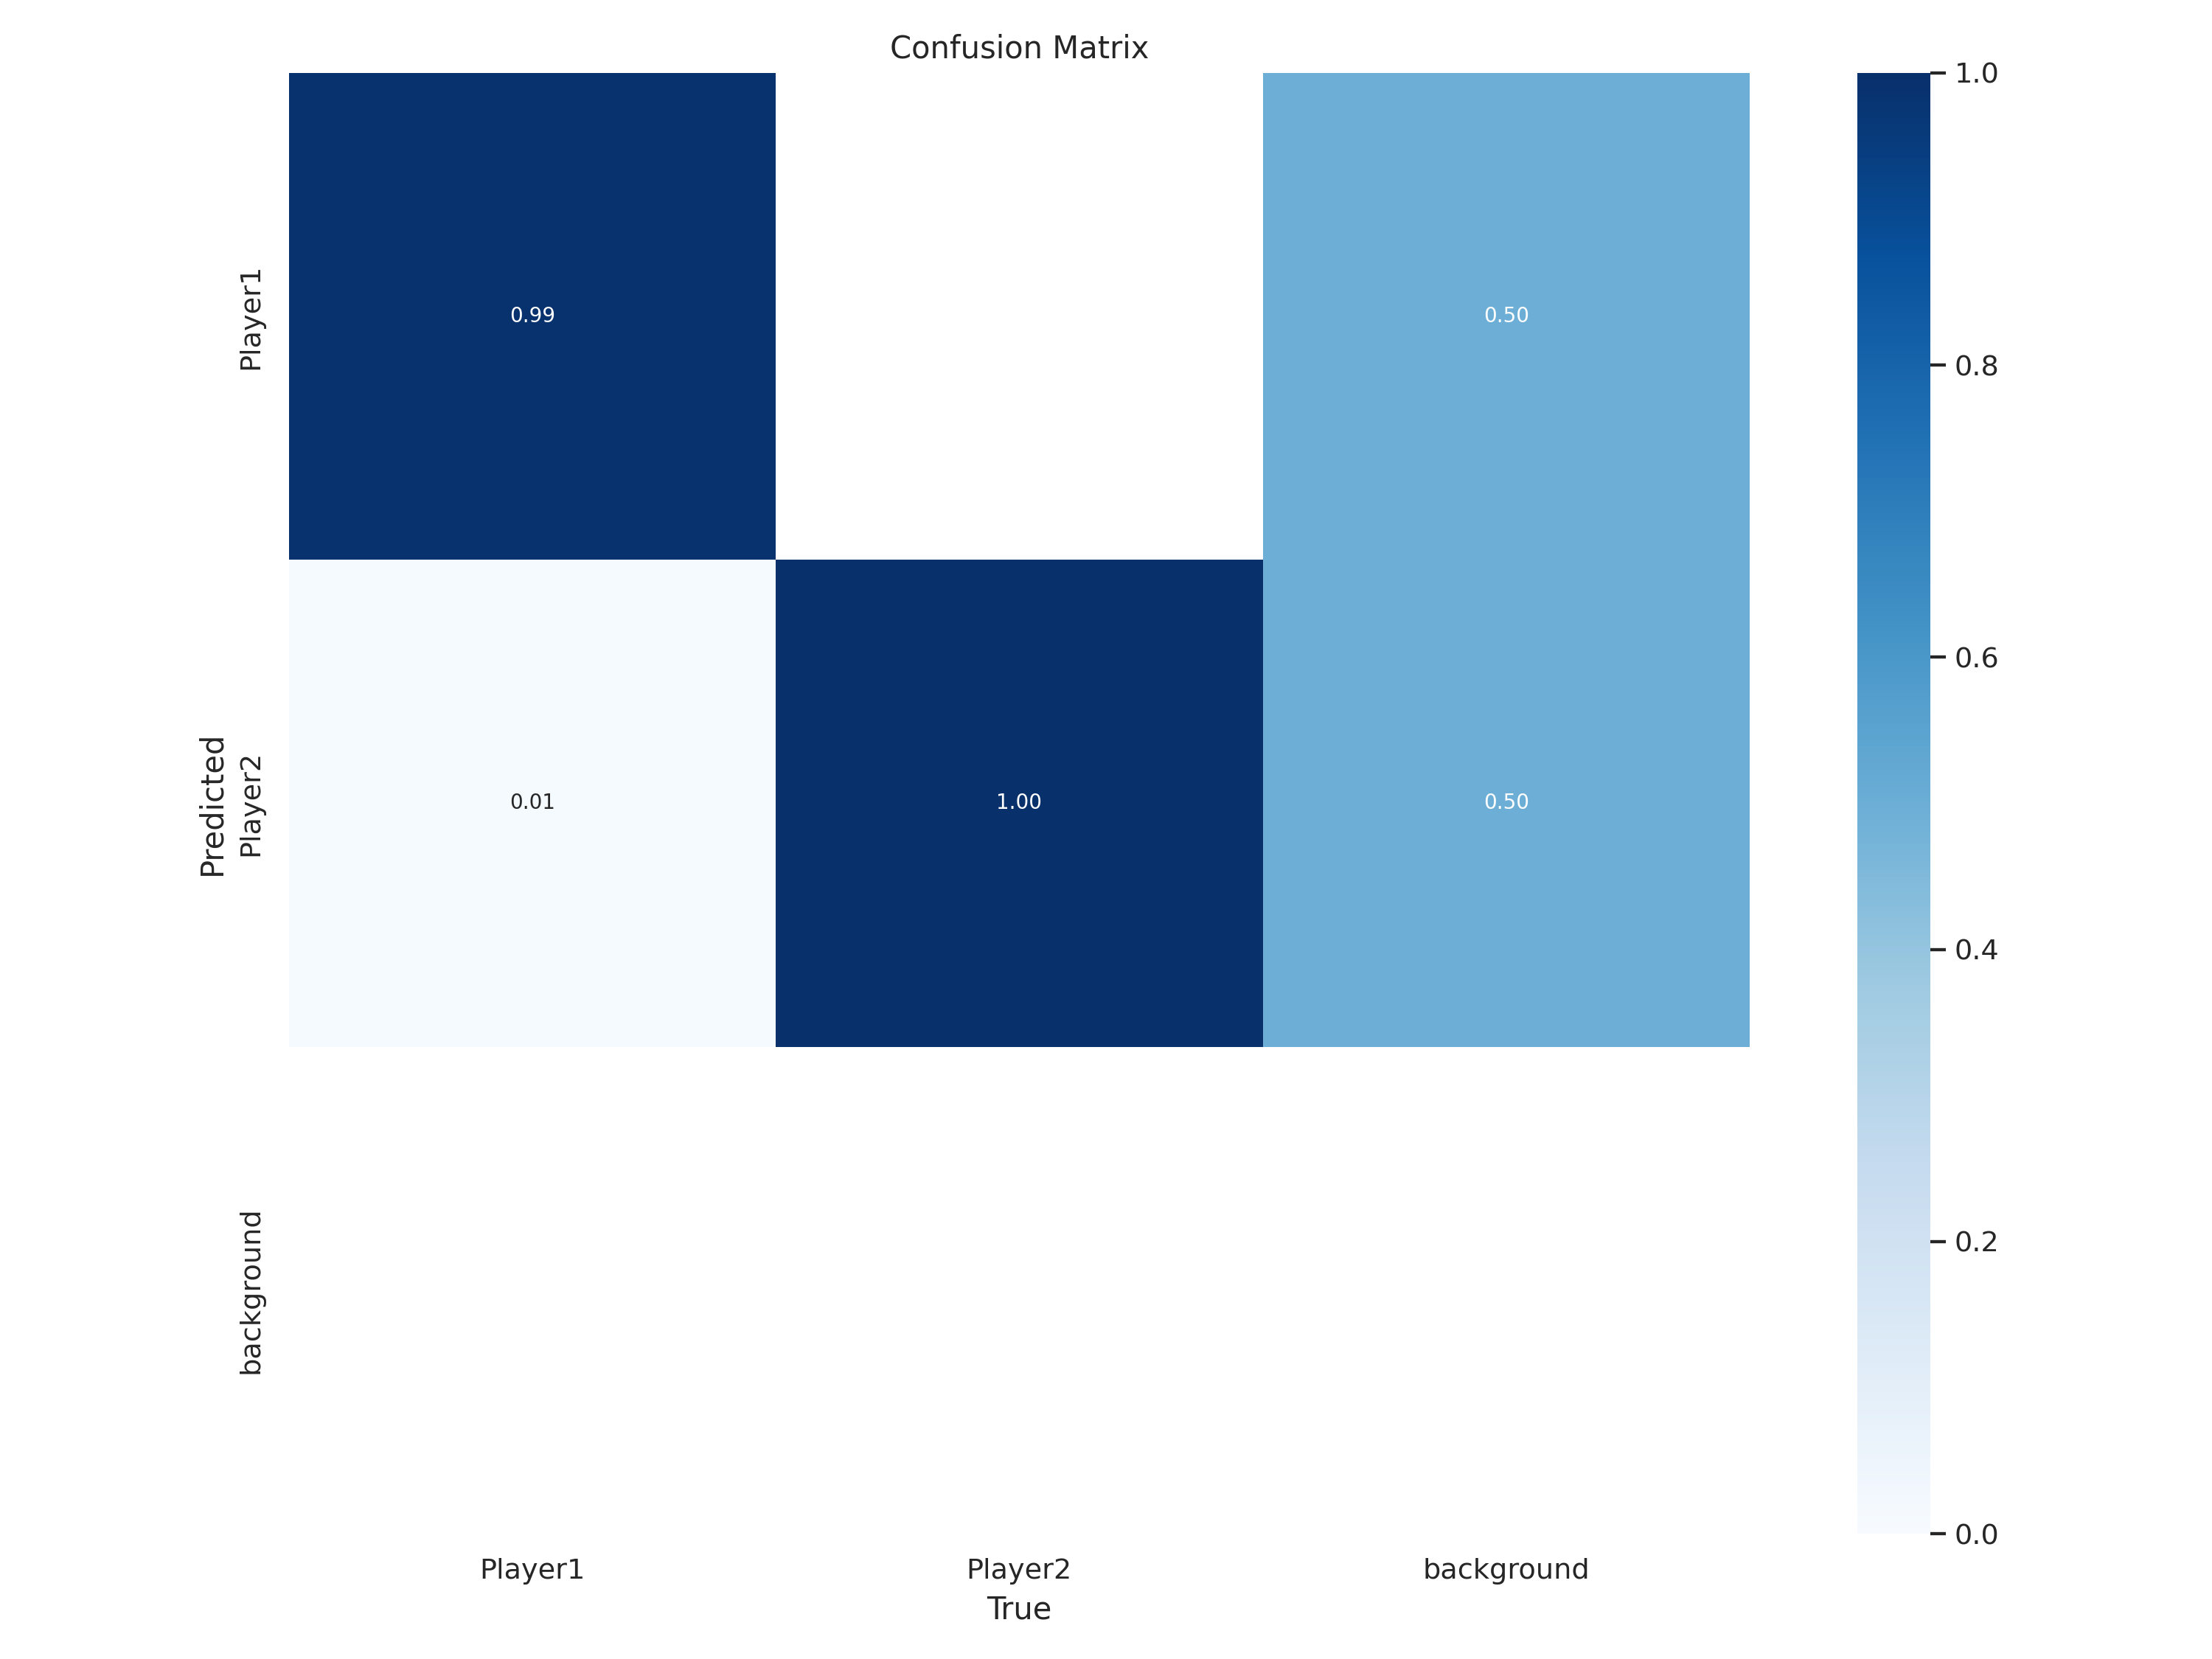

In [ ]:
Image(filename=f'{projectDir}/runs/detect/train2/confusion_matrix.png', width=600)

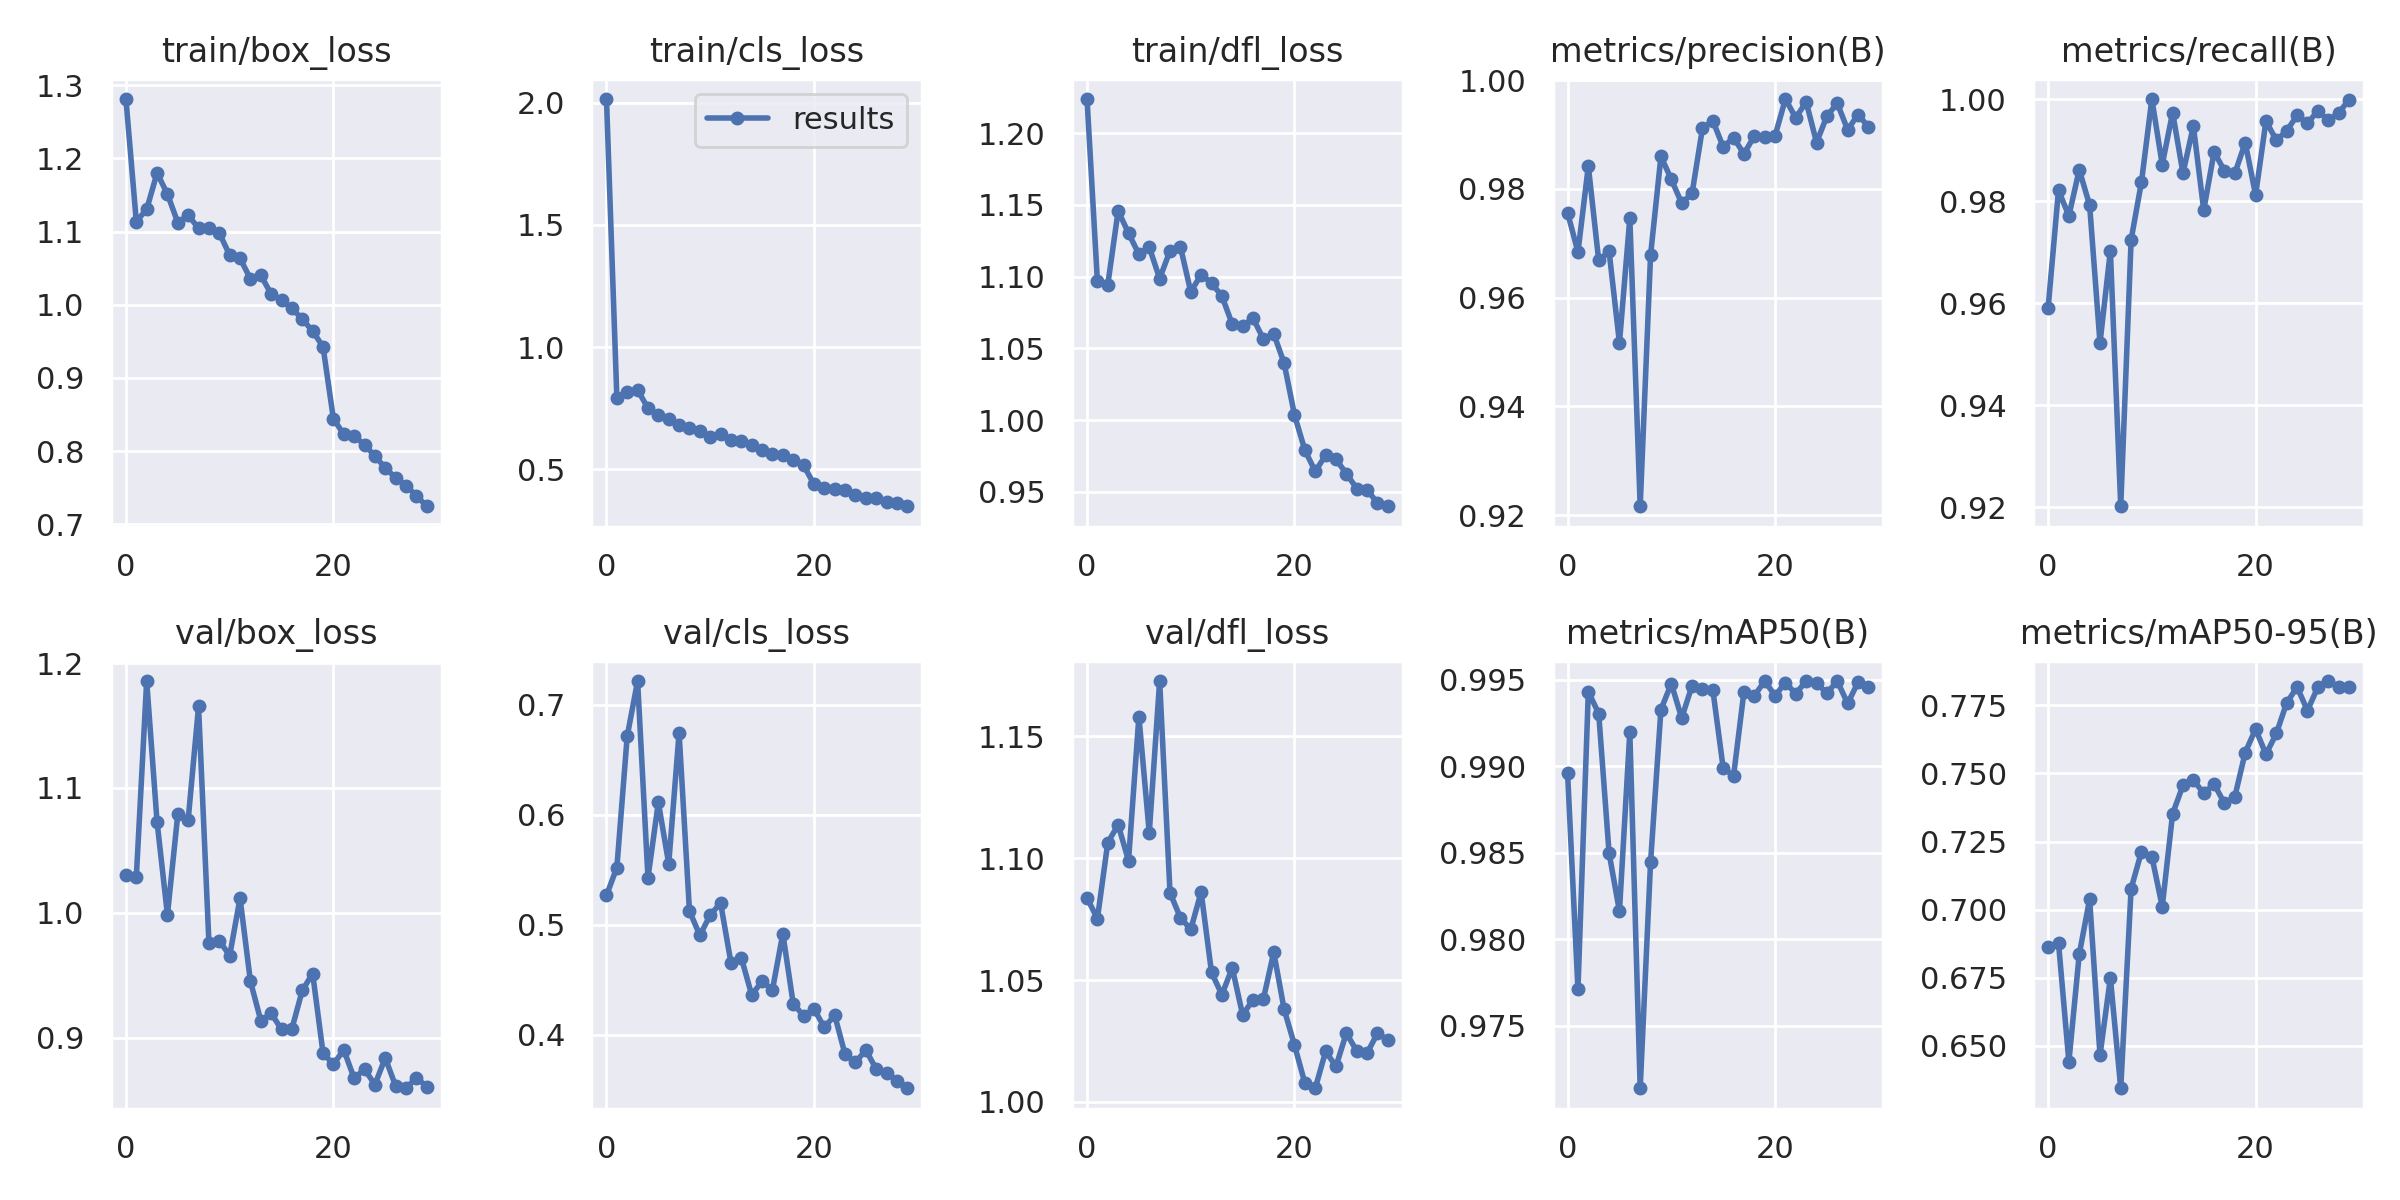

In [ ]:
Image(filename=f'{projectDir}/runs/detect/train2/results.png', width=600)

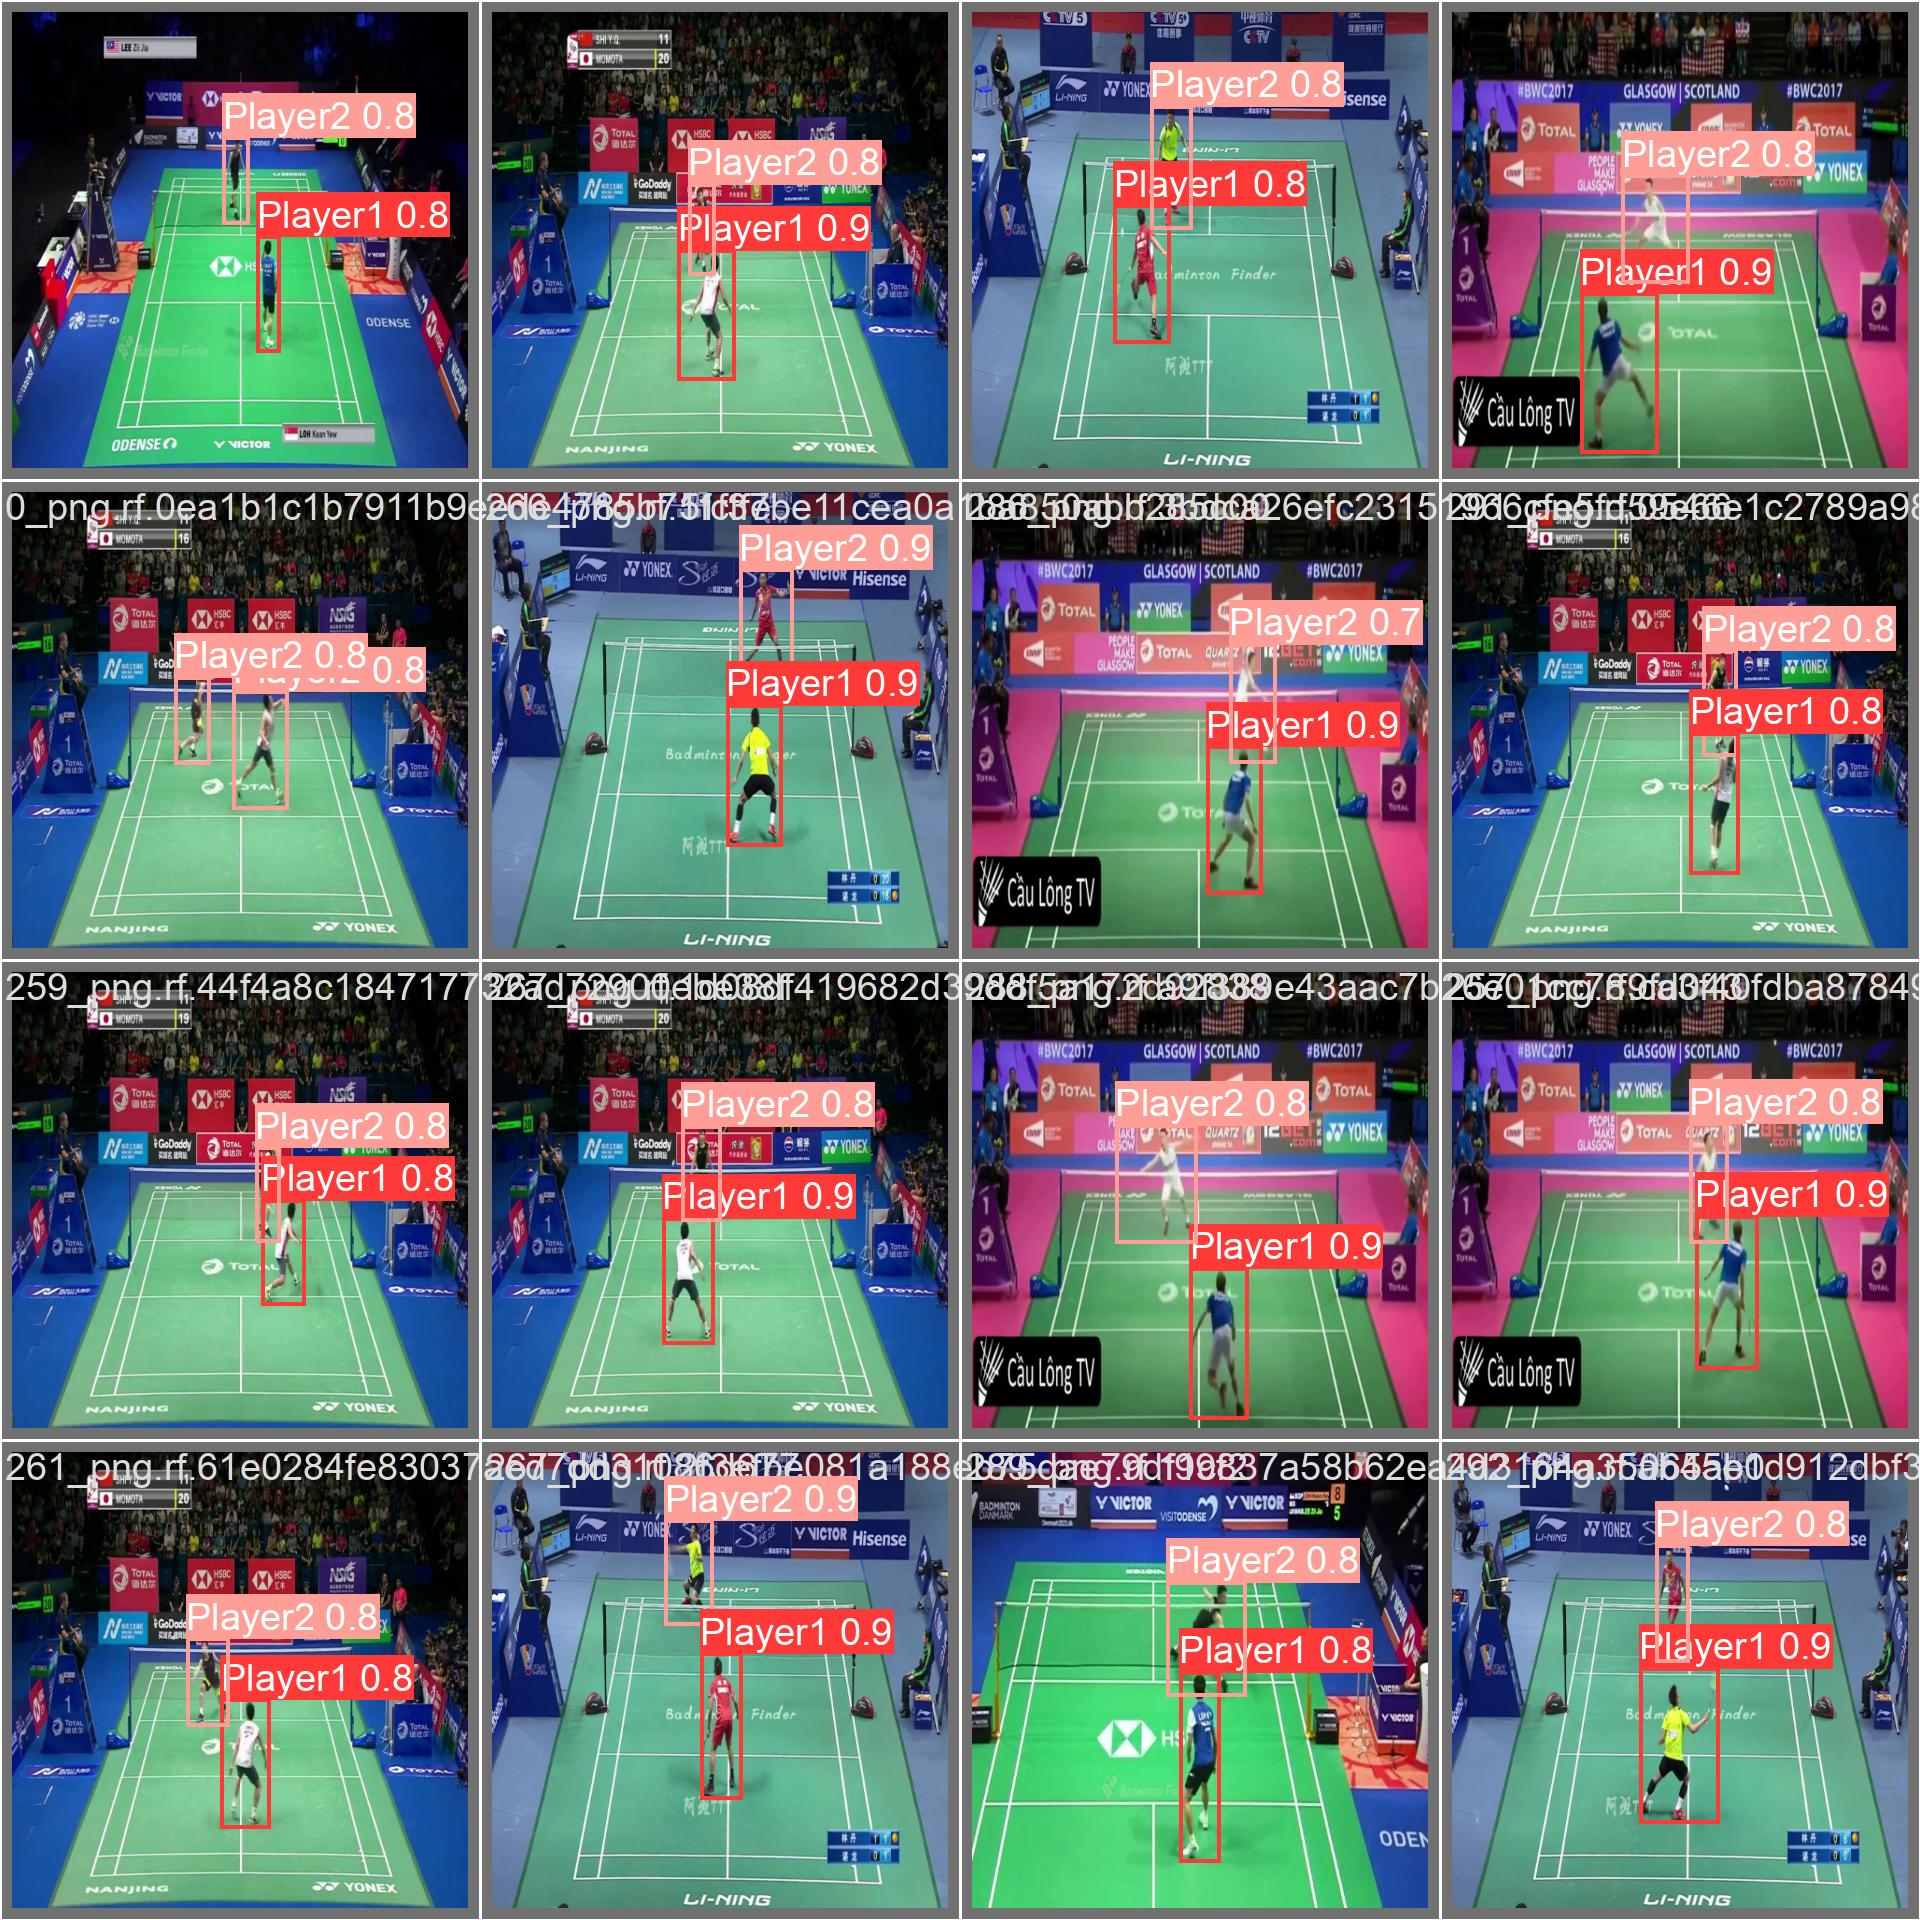

In [ ]:
Image(filename=f'{projectDir}/runs/detect/train2/val_batch0_pred.jpg', width=600)

custom validation

In [ ]:
%cd {projectDir}

!yolo task=detect \
mode=val \
model={projectDir}/runs/detect/train2/weights/best.pt \
data=/content/data.yaml

/content/drive/MyDrive/BadmintonPlayerDetector
2023-08-20 16:14:17.624169: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-20 16:14:18.573419: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/valid/labels.cache... 242 images, 0 backgrounds, 0 corrupt: 100% 242/242 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 16/16 [00:10<00:00,  1.52it/s]
                   all        242        481      0.991      0.996      0.994      0.784
             

inferencing the model

In [ ]:
%cd {projectDir}

!yolo task=detect \
mode=predict \
model={projectDir}/runs/detect/train2/weights/best.pt \
conf=0.25 \
source=/content/test/images \
save=True

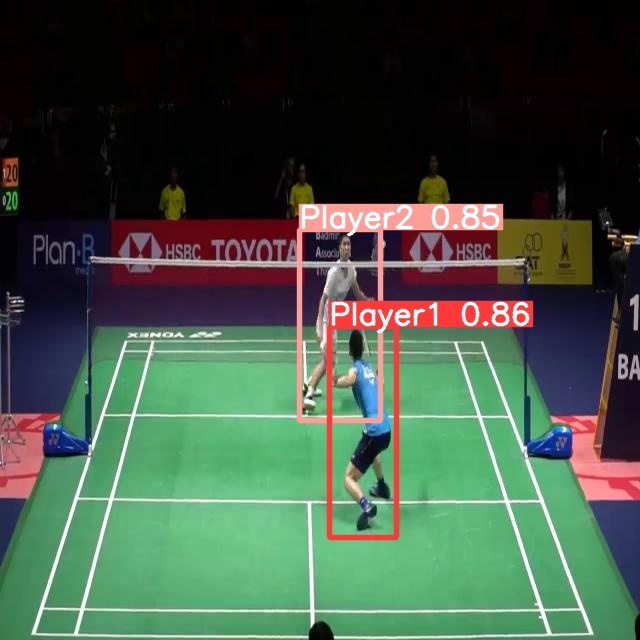

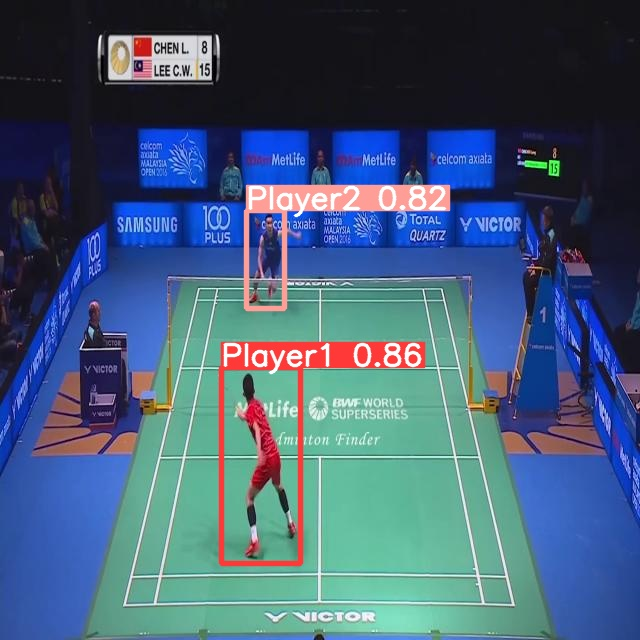

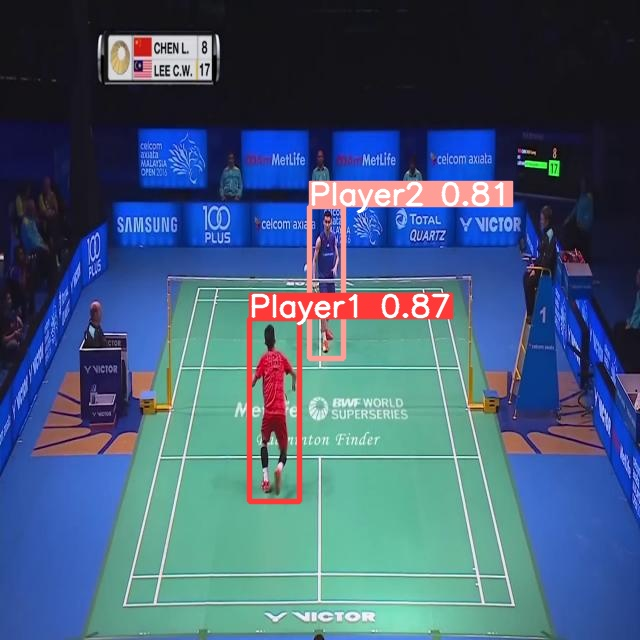

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{projectDir}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

Video Inferencing

In [35]:
model = YOLO(f"{projectDir}/runs/detect/train2/weights/best.pt")

In [ ]:
def detect_image(frame):
  cls_id = {0:'player1', 1: 'player2'}
  frame = cv2.resize(frame, (600, 600))
  detections = model.predict(frame, conf = 0.25)
  boxes = detections[0].boxes.cpu()
  labels = boxes.cls.numpy()
  for i, label in enumerate(labels):
      x, y, w, h = boxes.xywh.numpy()[i]
      conf = boxes.conf.numpy()[i]
      cv2.rectangle(frame, (int(x), int(y)), (int(x + w), int(y + h)), (0, 255, 0), 2)
      cv2.putText(frame, f"{cls_id[label]}:{conf}", (int(x), int(y) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
  return frame

vid = cv2.VideoCapture('/content/Badminton2023_423.mp4')
vid.set(cv2.CAP_PROP_FPS, 10)
frame_width = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('\content\Badminton2023_423_annotated.mp4', fourcc, 10, (frame_width, frame_height))

while True:
  ret, frame = vid.read()
  if ret:
    annotated_frame = detect_image(frame)
    annotated_frame = cv2.resize(annotated_frame, (frame_width, frame_height))
    out.write(annotated_frame)
  if cv2.waitKey(1) & 0xFF == ord('q'):
      break
out.release()
vid.release()